[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioRR-Tec/AprendizajeAutomatico/blob/master/Tema_4_AprendizajeAutomatico/notebook/Cross_Validation.ipynb)

<h2><center>Regularización en aprendizaje automático</center></h2>

Uno de los aspectos principales del entrenamiento de sus modelos de aprendizaje automático es evitar el sobreajuste. 

El modelo tendrá una precisión baja si está sobreajustado. Esto sucede porque su modelo se esfuerza demasiado por capturar el ruido en su conjunto de datos de entrenamiento. Por ruido nos referimos a los puntos de datos que realmente no representan las verdaderas propiedades de los datos. El aprendizaje de estos puntos de datos hace que su modelo sea más flexible, con el riesgo de sobreajuste.

----

El concepto de equilibrio entre sesgo y varianza es útil para comprender el fenómeno del sobreajuste.

---

Una de las formas de evitar el sobreajuste es mediante la [validación cruzada](https://scikit-learn.org/stable/modules/cross_validation.html), que ayuda a estimar el error sobre el conjunto de pruebas y a decidir qué parámetros funcionan mejor para su modelo.

<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png"/>

---

La validación cruzada es un concepto importante en el aprendizaje automático: puede reducir el tamaño de los datos y garantiza que el modelo de inteligencia artificial sea lo suficientemente robusto. 

La validación cruzada lo hace a costa del consumo de recursos, por lo que es importante comprender cómo funciona antes de decidir usarlo.

---

En esta notebook se verá lo siguiente:

* ¿Qué es KFold, ShuffledKfold y StratifiedKfold y en qué se diferencian?
* Cómo realizar la validación cruzada de su modelo sin KFold utilizando los métodos cross_validate y cross_val_score
* ¿Cuáles son las otras opciones de división? RepeatedKFold, LeaveOneOut y LeavePOut y un caso de uso para GroupKFold
* Qué tan importante es considerar la distribución de características y objetivos

### Beneficio 1: reducción del tamaño de los datos

Normalmente, divide los datos en 3 conjuntos.

* Entrenamiento: se utiliza para entrenar el modelo y optimizar los hiperparámetros del modelo.
* Prueba: se usa para verificar que el modelo optimizado funciona con datos desconocidos para probar que el modelo generaliza bien.

---

En el enfoque de validación cruzada más común, utiliza parte del conjunto de entrenamiento para las pruebas. Lo hace varias veces para que cada punto de datos aparezca una vez en el conjunto de prueba.

<img src = "https://miro.medium.com/max/706/1*TQ0YnrWkCAsIGEYawO_QFg.jpeg"/>

### Beneficio 2: proceso robusto

Aunque el método train_test_split de sklearn utiliza una división estratificada, lo que significa que el entrenamiento y el conjunto de pruebas tienen la misma distribución de la variable objetivo, es posible que entrenes accidentalmente en un subconjunto que no refleja el mundo real.

---

Imagina que intentas predecir si una persona es hombre o mujer por su altura y peso. Se podría suponer que las personas más altas y pesadas preferirían ser hombres; aunque si tiene mucha mala suerte, los datos de su entrenamiento solo incluirían hombres enanos y mujeres altas Amazónicas....

<img src="https://i.ytimg.com/vi/-wZSQ2EW8cI/hqdefault.jpg"/>

Gracias a la validación cruzada, realiza múltiples divisiones train_test y, si bien un pliegue puede lograr resultados extraordinarios, el otro puede tener un rendimiento inferior. Cada vez que una de las divisiones muestra resultados inusuales, significa que hay una anomalía en sus datos.



In [1]:
# create the range 1 to 25
rn = range(1,26)

In [2]:
rn

range(1, 26)

In [33]:
from sklearn.model_selection import KFold

kf5 = KFold(n_splits=5, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=False)

In [34]:
# the Kfold function returns the indices of the data. Our range goes 
# from 1-25 so the index is 0-24

for train_index, test_index in kf3.split(rn):
    print(train_index, test_index)
    
'''KFold devuelve índices, no los puntos de datos reales.'''

[ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [0 1 2 3 4 5 6 7 8]
[ 0  1  2  3  4  5  6  7  8 17 18 19 20 21 22 23 24] [ 9 10 11 12 13 14 15 16]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [17 18 19 20 21 22 23 24]


'KFold devuelve índices, no los puntos de datos reales.'

In [5]:
import numpy as np
# to get the values from our data, we use np.take() 
# to access a value at particular index
for train_index, test_index in kf3.split(rn):
    print(np.take(rn,train_index), np.take(rn,test_index))

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25] [1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 18 19 20 21 22 23 24 25] [10 11 12 13 14 15 16 17]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [18 19 20 21 22 23 24 25]


## ¿Cómo divide KFold los datos?

Para comprender mejor cómo el método KFold divide los datos...

In [6]:
# import libraries for charting and manipulations with datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

def kfoldize(kf, rn, shift=.1):
    train = pd.DataFrame()
    test = pd.DataFrame()
    i = 1
    for train_index, test_index in kf.split(rn):
        train_df = pd.DataFrame(np.take(rn, train_index), columns=["x"])
        train_df["val"] = i - shift
        train = train.append(train_df)

        test_df = pd.DataFrame(np.take(rn, test_index), columns=["x"])
        test_df["val"] = i + shift
        test = test.append(test_df)
        i += 1
    return train, test

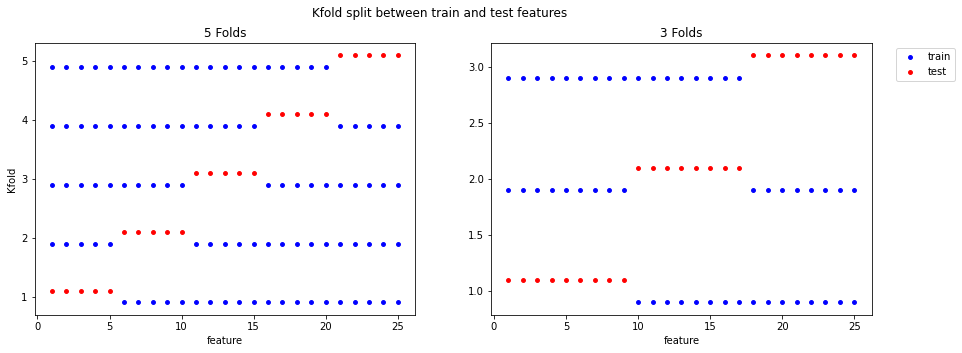

In [7]:
train5, test5 = kfoldize(kf5,rn)
train3, test3 = kfoldize(kf3,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train5)
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test5)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train3)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test3)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[1].set_xlabel("feature")
ax[0].set_title("5 Folds")
ax[1].set_title("3 Folds")
plt.suptitle("Kfold split between train and test features")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()


Debido a que hemos usado shuffled = False, el primer punto de datos pertenece al conjunto de prueba en el primer pliegue, el siguiente también. Los puntos de datos de prueba y entrenamiento están muy bien organizados.

---

### KFold aleatorio

Sus datos pueden seguir un orden específico y puede ser arriesgado seleccionar los datos en orden de aparición. Eso se puede resolver configurando el parámetro shuffle de KFold en True. En ese caso, KFold seleccionará aleatoriamente los puntos de datos que se convertirían en parte del tren y el conjunto de pruebas. O para ser precisos, no completamente al azar, random_state influye en los puntos que aparecen en cada conjunto y el mismo random_state siempre resulta en la misma división.



In [8]:
kf42 = KFold(n_splits=5, shuffle=True, random_state=42)
kf123 = KFold(n_splits=5, shuffle=True, random_state=123)

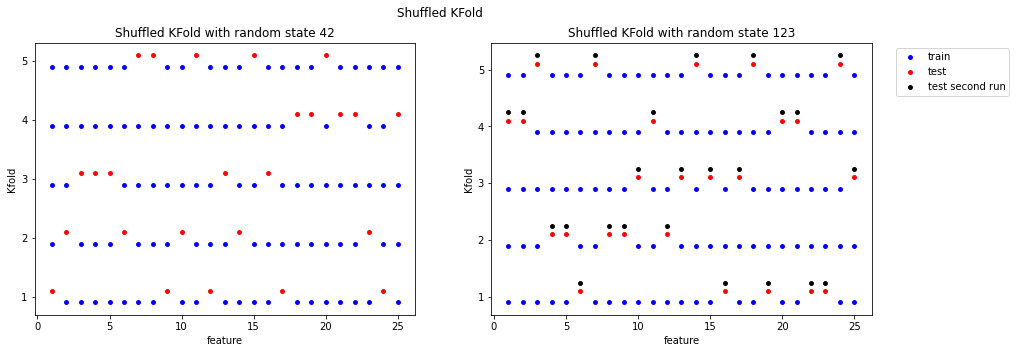

In [9]:
train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(kf123,rn)
train123_2, test123_2 = kfoldize(kf123,rn,shift=.25)

fig,ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
ax[1].scatter(x="x",y="val",c="k",label="test second run",s=15,data=test123_2)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("Shuffled KFold with random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("Shuffled KFold with random state 123")
plt.suptitle("Shuffled KFold")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

### Kfold en el conjunto de datos real

Usemos Kfold para evaluar un modelo de clasificación del popular Iris Dataset.... nuestro buen **"Hola Mundo!" de ML**.

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
features = iris['feature_names']
iris_df['target'] = iris.target
iris_df["target_name"] = iris_df['target'].map({i:name for i,name in enumerate(iris.target_names)})
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [9]:
pd.DataFrame(iris_df.groupby("target_name").size().reset_index()).rename(columns={0:"samples"})

,target_name,samples
0,setosa,50
1,versicolor,50
2,virginica,50


### Pliegue simple

Realicemos una regresión logística utilizando train_test_split tradicional que dividirá los datos en entrenamiento y prueba, de modo que cada valor objetivo aparezca en el conjunto de entrenamiento y prueba un número similar de veces.

In [10]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.datasets import load_iris, load_boston
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [11]:
# initialize the model
model = LogisticRegression(solver="liblinear", multi_class="auto")

In [30]:
X = iris_df[features]
y = iris_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [31]:
#Train the model
model.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, model.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, model.predict(X_test))]})

,Accurancy on Train,Accurancy on Test
0,0.958333,0.833333


## KFold

El método Kfold devuelve el orden de las muestras elegidas para el `train` y `test` en cada pliegue. En pandas, usamos la función .iloc para obtener las filas correctas. 

Como no he dividido los datos en $X$(características) y $y$ (destino), también tengo que usar .loc, para elegir las columnas correctas (.loc [:, características]) o simplemente elegir las columnas (['destino'])

In [35]:
i = 1
for train_index, test_index in kf3.split(iris_df):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index][features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.loc[test_index]['target']
        
    #Train the model
    model.fit(X_train, y_train) #Training the model
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, model.predict(X_test))}")
    i += 1

Accuracy for the fold no. 1 on the test set: 0.0
Accuracy for the fold no. 2 on the test set: 0.0
Accuracy for the fold no. 3 on the test set: 0.0


<center>Pero, ¿por qué la precisión es cada vez de 0,0? </center>

La razón es la uniformidad de las divisiones. Dado que los datos están ordenados para que setosa aparezca en las primeras cincuenta filas del conjunto de datos, seguido de versicolor y virginica, hemos logrado una distribución única del conjunto de entrenamiento, que no contiene ningún objetivo esperado en el conjunto de prueba. 

La mayoría de los modelos de aprendizaje automático no pueden aprender a clasificar en una clase que nunca ha visto. Que es visible en la tercera división

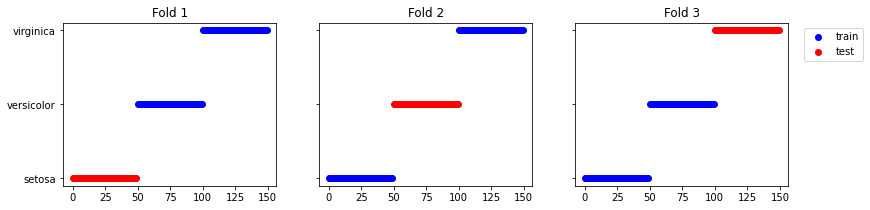

In [36]:
target_name = iris_df["target"]

fig, ax = plt.subplots(1,3, figsize=(13,3), sharey=True)
for i, (train_index, test_index) in enumerate(kf3.split(iris_df)):
    ax[i].scatter(x=train_index,y=target_name.iloc[train_index],label ="train", c='b')
    ax[i].scatter(x=test_index,y=target_name.iloc[test_index], label = "test", c='r')
    ax[i].set_title(f"Fold {i+1}")

ax[0].set_yticks([0,1,2])
ax[0].set_yticklabels(iris["target_names"])
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## KFold aleatorio

Una forma de solucionar este problema es utilizar el Kfold aleatorio...

In [37]:
dfs = []
kf = KFold(n_splits=3, shuffle=True, random_state=123)
i = 1

for train_index, test_index in kf.split(iris_df):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index].loc[:,features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.loc[test_index].loc[:,'target']
    
    #Train the model
    model.fit(X_train, y_train) #Training the model
    y_pred = model.predict(X_test)
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, y_pred)}")
    
    # how many occurances appear in the train set
    s_train = iris_df.iloc[train_index].loc[:,'target_name'].value_counts()
    s_train.name = f"train {i}"
    s_test = iris_df.iloc[test_index].loc[:,'target_name'].value_counts()
    s_test.name = f"test {i}"
    df = pd.concat([s_train, s_test], axis=1, sort=False)
    df["|"] = "|"
    dfs.append(df)
    
    i += 1

Accuracy for the fold no. 1 on the test set: 0.98
Accuracy for the fold no. 2 on the test set: 0.94
Accuracy for the fold no. 3 on the test set: 0.88


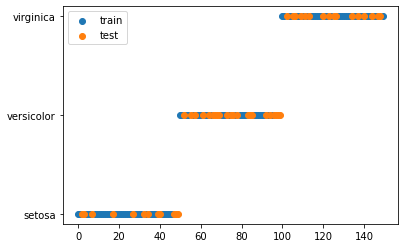

In [38]:
plt.scatter(x=y_train.index,y=iris_df.iloc[train_index].loc[:,'target_name'],label ="train")
plt.scatter(x=y_test.index,y=iris_df.iloc[test_index].loc[:,'target_name'], label = "test")
plt.legend()
plt.show()

Puede ver que ahora seleccionamos muestras de los tres tipos de iris, sin embargo, algunos se eligen con más frecuencia que otros.



In [39]:
pd.concat(dfs,axis=1, sort=False)

,train 1,test 1,|,train 2,test 2,|,train 3,test 3,|
versicolor,39,11,|,33,17,|,28,22,|
virginica,31,19,|,35,15,|,34,16,|
setosa,30,20,|,32,18,|,38,12,|


---
---


## KFold estratificado

En lugar de usar Kfold aleatorio, podemos usar **StratifiedKFold** que necesita un parámetro adicional $y$. A medida que utiliza la variable objetivo para que el Kfold y elija una distribución equilibrada de los objetivos en cada pliegue.



In [57]:
dfs = []
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)
i = 1
for train_index, test_index in kf.split(iris_df, iris_df["target"]):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index].loc[:,features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.loc[test_index].loc[:,'target']

    #Train the model
    model.fit(X_train, y_train) #Training the model
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, model.predict(X_test))}, doublecheck: {model.score(X_test,y_test)}")
    
    # how many occurances appear in the train set
    s_train = iris_df.iloc[train_index].loc[:,'target_name'].value_counts()
    s_train.name = f"train {i}"
    s_test = iris_df.iloc[test_index].loc[:,'target_name'].value_counts()
    s_test.name = f"test {i}"
    df = pd.concat([s_train, s_test], axis=1, sort=False)
    df["|"] = "|"
    dfs.append(df)
    
    i += 1

Accuracy for the fold no. 1 on the test set: 0.94, doublecheck: 0.94
Accuracy for the fold no. 2 on the test set: 0.98, doublecheck: 0.98
Accuracy for the fold no. 3 on the test set: 0.92, doublecheck: 0.92


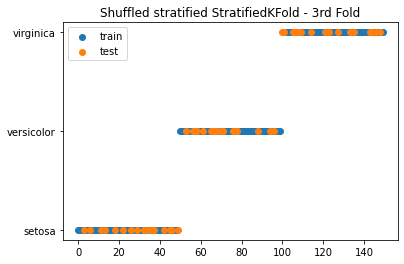

In [37]:
plt.scatter(x=y_train.index,y=iris_df.iloc[train_index].loc[:,'target_name'],label ="train")
plt.scatter(x=y_test.index,y=iris_df.iloc[test_index].loc[:,'target_name'], label = "test")
plt.legend()
plt.title("Shuffled stratified StratifiedKFold - 3rd Fold")
plt.show()

In [58]:
pd.concat(dfs,axis=1, sort=False)

,train 1,test 1,|,train 2,test 2,|,train 3,test 3,|
virginica,34,16,|,33,17,|,33,17,|
setosa,33,17,|,33,17,|,34,16,|
versicolor,33,17,|,34,16,|,33,17,|


---

## Validación cruzada sin KFold

Si no quieres jugar con los datos divididos, no tienes que hacer KFolds, cross_validate o cross_val_score entrenará usando sus datos y el número preferido de divisiones y le dará la puntuación en el conjunto de pruebas.



In [62]:
for i, score in enumerate(cross_validate(model, X,y, cv=10)["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 1.0
Accuracy for the fold no. 1 on the test set: 1.0
Accuracy for the fold no. 2 on the test set: 1.0
Accuracy for the fold no. 3 on the test set: 0.9333333333333333
Accuracy for the fold no. 4 on the test set: 0.9333333333333333
Accuracy for the fold no. 5 on the test set: 0.9333333333333333
Accuracy for the fold no. 6 on the test set: 0.8
Accuracy for the fold no. 7 on the test set: 0.9333333333333333
Accuracy for the fold no. 8 on the test set: 1.0
Accuracy for the fold no. 9 on the test set: 1.0


In [63]:
for i, score in enumerate(cross_val_score(model, X,y, cv=3)):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.96
Accuracy for the fold no. 1 on the test set: 0.96
Accuracy for the fold no. 2 on the test set: 0.94


In [49]:
titanic = pd.read_csv('../data/train.csv').sort_values(by="Sex").reset_index(drop=True)
dfs = []
dfs_data = []

kf = StratifiedKFold(n_splits=3, shuffle=False, random_state=123)
i = 1
for train_index, test_index in kf.split(titanic, titanic["Survived"]):
    X_train = titanic.iloc[train_index].drop(columns=["Survived"])
    X_test = titanic.iloc[test_index].drop(columns=["Survived"])
    y_train = titanic.iloc[train_index].loc[:,"Survived"]
    y_test = titanic.loc[test_index].loc[:,"Survived"]
    
    dfs_data.append({"train": pd.concat([X_train,y_train], axis=1, sort=False), "test": pd.concat([X_test,y_test], axis=1, sort=False)})
    
    #Train the model
    #model.fit(X_train, y_train) #Training the model
    #print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, model.predict(X_test))}, doublecheck: {model.score(X_test,y_test)}")
       
    i += 1

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Con **StratifiedKFold**, esperaríamos tener la misma proporción de sobrevivientes y víctimas tanto en el conjunto de datos de entrenamiento como de prueba. Mirando la distribución y los gráficos, esta expectativa parece cumplirse.

In [50]:
statistics = []
for i, data in enumerate(dfs_data):
    for st in ["train","test"]:
        s = data[st][["Survived"]].groupby(["Survived"]).size()
        s.index = s.index.map({0:"Died",1:"Survived"})
        s.name = f"{st} - {i+1}"
        statistics.append(s)

pd.concat(statistics, axis=1).reset_index()

,Survived,train - 1,test - 1,train - 2,test - 2,train - 3,test - 3
0,Died,366,183,366,183,366,183
1,Survived,228,114,228,114,228,114


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


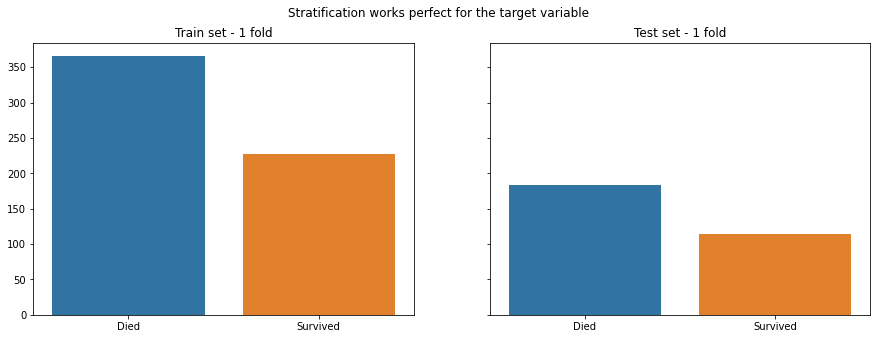

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


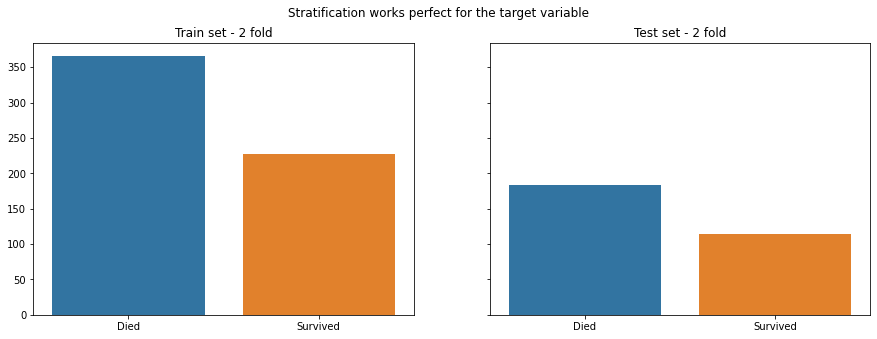

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


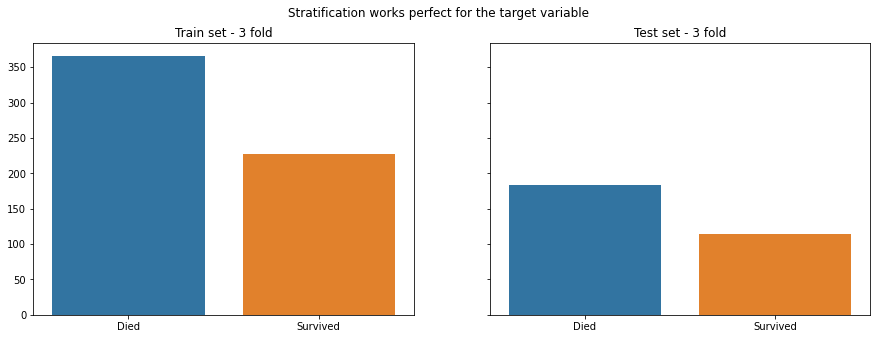

In [66]:
for i, data in enumerate(dfs_data):
    fig, ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
    plot_df = dfs_data[i]["train"][["Survived"]].groupby(["Survived"]).size()
    plot_df.index = plot_df.index.map({0:"Died",1:"Survived"})
    sns.barplot(plot_df.index, plot_df.values,ax=ax[0])
    ax[0].set_title(f"Train set - {i+1} fold")
    ax[0].set_xlabel('')
    plot_df = dfs_data[i]["test"][["Survived"]].groupby(["Survived"]).size()
    plot_df.index = plot_df.index.map({0:"Died",1:"Survived"})
    sns.barplot(plot_df.index, plot_df.values,ax=ax[1])
    ax[1].set_title(f"Test set - {i+1} fold")
    ax[1].set_xlabel('')
    plt.suptitle("Stratification works perfect for the target variable")
    plt.show()

Sin embargo, **StratifiedKFold** no analiza la distribución de las características de entrada en absoluto.

Se ha ordenado la entrada por género para demostrar esto .sort_values (por = "Sexo"). 

Como pueden ver, la proporción de géneros en el entrenamiento y prueba no está bien correlacionadas, lo que puede ser un problema, porque las mujeres tuvieron más probabilidades para sobrevivir a esta catástrofe. 

Si el conjunto de datos de prueba contiene principalmente hombres, el modelo podría esperar una tasa de mortalidad mucho más alta. De lo contrario, el modelo podría volverse muy optimista.

In [51]:
# table showing distribution of the sexes in the StratifiedKFold split
metric_dfs = []
for i, data in enumerate(dfs_data):
    s = dfs_data[i]["train"].groupby("Sex").size()
    s.name = f"Fold {i+1} Train"
    st = dfs_data[i]["test"].groupby("Sex").size()
    st.name = f"Fold {i+1} Test"
    metric_df = pd.concat([s,st],axis=1)
    metric_df["|"] = "|"
    metric_dfs.append(metric_df)
pd.concat(metric_dfs,axis=1).reset_index()

,Sex,Fold 1 Train,Fold 1 Test,|,Fold 2 Train,Fold 2 Test,|,Fold 3 Train,Fold 3 Test,|
0,female,119,195,|,200,114,|,309,5,|
1,male,475,102,|,394,183,|,285,292,|


NameError: name 'sns' is not defined

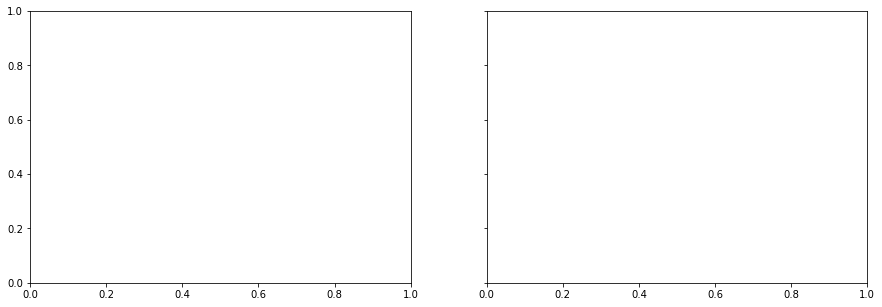

In [52]:
for i, data in enumerate(dfs_data):
    fig, ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
    plot_df = dfs_data[i]["train"][["Sex"]].groupby(["Sex"]).size()
    sns.barplot(plot_df.index, plot_df.values,ax=ax[0])
    ax[0].set_title(f"Train set - {i+1} fold")
    plot_df = dfs_data[i]["test"][["Sex"]].groupby(["Sex"]).size()
    sns.barplot(plot_df.index, plot_df.values,ax=ax[1])
    ax[1].set_title(f"Test set - {i+1} fold")
    plt.suptitle("Stratification doesn't consider distribution of the features")
    plt.show()

Preparar una distribución ideal de las características es una tarea bastante compleja, especialmente si tiene una gran cantidad de características y te gustaría entrenar y probar el modelo considerando todas las combinaciones principales de características. 

---

Luego platicaremos acerca del [balanceo de clases](https://machinelearningmastery.com/what-is-imbalanced-classification/), pero si tratamos de utilizar StratifiedKFold mezclado, la distribución se ve mejor. 


Tomen en cuenta todo esto al crear su modelo, pero la buena noticia es que la validación cruzada puede ayudar a identificar que hay algo malo en caso de que la puntuación del modelo difiera significativamente en algunos de los pliegues.

### Exploremos otros métodos de validación cruzada

<h2><center>KFold repetido</center></h2>


In [69]:
from sklearn.model_selection import RepeatedKFold

kf42 = KFold(n_splits=3, shuffle=True, random_state=42)
krf42 = RepeatedKFold(n_splits=3, n_repeats=2, random_state=42)

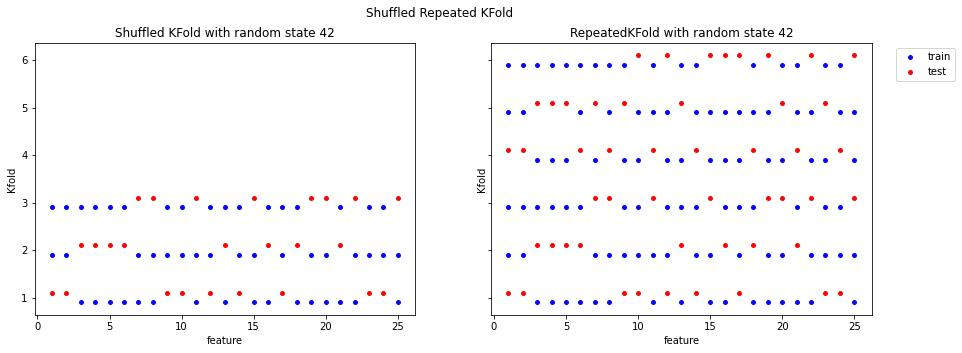

In [70]:
train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(krf42,rn)
#train123_2, test123_2 = kfoldize(kf123,rn,shift=.25)

fig,ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
#ax[1].scatter(x="x",y="val",c="k",label="test second run",s=15,data=test123_2)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("Shuffled KFold with random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("RepeatedKFold with random state 42")
plt.suptitle("Shuffled Repeated KFold")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

RepeatedKFold se baraja según el diseño. La primera repetición es la misma que KFold aleatorio, que tiene el mismo estado y las siguientes repeticiones crean otra combinación.

---

## [ShuffleSplit](https://scikit-learn.org/stable/modules/cross_validation.html#random-permutations-cross-validation-a-k-a-shuffle-split)



In [71]:
from sklearn.model_selection import ShuffleSplit

kf42 = KFold(n_splits=3, shuffle=True, random_state=42)
ss = ShuffleSplit(n_splits=3, test_size=0.5, random_state=42)

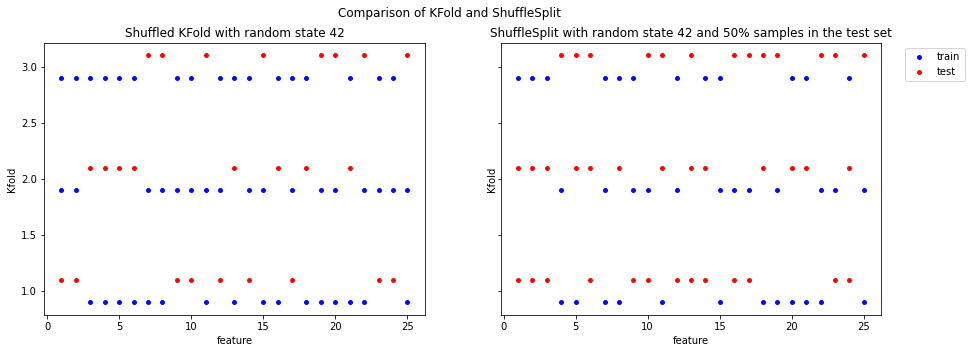

In [72]:
train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(ss,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("Shuffled KFold with random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("ShuffleSplit with random state 42 and 50% samples in the test set")
plt.suptitle("Comparison of KFold and ShuffleSplit")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

Mientras que KFold se asegura de que cada muestra aparezca una vez en el conjunto de prueba, con ShuffleSplit se especifica cuántas muestras hay en el conjunto de prueba. ShuffleSplit estratificado consideraría la distribución de una variable target.

## Comparaciones entre la validación cruzada y la división de train/test

La validación cruzada proporciona una medida más precisa de la calidad del modelo, lo cual es especialmente importante si están tomando muchas decisiones de modelado. Sin embargo, puede llevar más tiempo ejecutarlo, ya que estima los modelos una vez por cada pliegue. Entonces está haciendo un trabajo más general.
